In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import re

## Data Cleaning and Preparation

In [13]:
df_dark = pd.read_csv(r'dark_sensor_data_20251006_134102.csv')
df_primo_l = pd.read_csv(r'primo_l_sensor_data_20251006_134927.csv')
df_primo_r = pd.read_csv(r'primo_r_sensor_data_20251006_134657.csv')
df_regular = pd.read_csv(r'regular_sensor_data_20251006_134410.csv')

df_regular['time_only'] = pd.to_datetime(df_regular['timestamp']).dt.time
df_primo_l['time_only'] = pd.to_datetime(df_primo_l['timestamp']).dt.time
df_primo_r['time_only'] = pd.to_datetime(df_primo_r['timestamp']).dt.time
df_dark['time_only'] = pd.to_datetime(df_dark['timestamp']).dt.time

df_regular = pd.read_csv(r'regular_sensor_data_20251006_134410.csv')
df_regular['time_only'] = pd.to_datetime(df_regular['gyro_time']).dt.time
df_primo_l['time_only'] = pd.to_datetime(df_primo_l['gyro_time']).dt.time
df_primo_r['time_only'] = pd.to_datetime(df_primo_r['gyro_time']).dt.time
df_dark['time_only'] = pd.to_datetime(df_dark['gyro_time']).dt.time

In [14]:
df_regular

,timestamp,gravity_x,gravity_y,gravity_z,gravity_time,lin_acc_x,lin_acc_y,lin_acc_z,lin_acc_time,acc_x,acc_y,acc_z,acc_time,gyro_x,gyro_y,gyro_z,gyro_time,time_only
0,2025-10-06 13:42:40.467744,0.075227,-0.221697,-9.807206,6.161668,-0.021339,0.006445,0.004092,6.161668,0.051942,-0.214055,-9.806557,6.166632,0.000354,0.000606,-0.000938,6.161668,00:00:00
1,2025-10-06 13:42:40.585996,0.074633,-0.221873,-9.807207,6.280815,-0.014009,-0.002510,0.003794,6.280815,0.062420,-0.222437,-9.804312,6.285780,0.001536,-0.001335,-0.000147,6.280815,00:00:00
2,2025-10-06 13:42:40.703102,0.074591,-0.222073,-9.807202,6.399962,-0.019207,0.001132,0.001544,6.399962,0.055834,-0.218396,-9.803414,6.404927,0.002181,-0.001136,-0.001250,6.399962,00:00:00
3,2025-10-06 13:42:40.826482,0.073361,-0.221379,-9.807228,6.519108,-0.016480,0.005378,0.004861,6.519108,0.056133,-0.216450,-9.803414,6.524073,-0.001500,0.000552,-0.001439,6.519108,00:00:00
4,2025-10-06 13:42:40.952170,0.072368,-0.221508,-9.807234,6.648184,-0.021923,0.004758,0.005764,6.648184,0.049397,-0.216600,-9.802965,6.653149,0.001707,-0.000244,0.000282,6.648184,00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653,2025-10-06 13:44:09.770173,0.055694,-0.219659,-9.807383,95.472558,-0.001208,-0.003827,0.004119,95.472558,0.052092,-0.222887,-9.802216,95.467594,-0.000534,-0.001619,-0.001018,95.472558,00:00:00
654,2025-10-06 13:44:09.908932,0.055871,-0.220280,-9.807366,95.601636,0.002957,0.005178,0.006199,95.601636,0.057630,-0.217198,-9.799821,95.606600,0.000305,0.000077,0.000041,95.601636,00:00:00
655,2025-10-06 13:44:10.073194,0.055610,-0.220447,-9.807368,95.770429,0.001272,0.001901,0.008891,95.770429,0.055834,-0.218396,-9.796079,95.775394,-0.001836,0.000032,-0.001581,95.770429,00:00:00
656,2025-10-06 13:44:10.203639,0.055519,-0.220684,-9.807359,95.899506,0.000913,-0.002053,0.003797,95.899506,0.057780,-0.221839,-9.802965,95.904471,0.000558,-0.000577,0.000013,95.899506,00:00:00


In [15]:
df_dark = df_dark[['timestamp', 'gyro_x', 'gyro_y', 'gyro_z', 'gyro_time', 'time_only', 'acc_x', 'acc_y', 'acc_z']].copy()
df_primo_l = df_primo_l[['timestamp', 'gyro_x', 'gyro_y', 'gyro_z', 'gyro_time', 'time_only', 'acc_x', 'acc_y', 'acc_z']].copy()
df_primo_r = df_primo_r[['timestamp', 'gyro_x', 'gyro_y', 'gyro_z', 'gyro_time', 'time_only', 'acc_x', 'acc_y', 'acc_z']].copy()
df_regular = df_regular[['timestamp', 'gyro_x', 'gyro_y', 'gyro_z', 'gyro_time', 'time_only', 'acc_x', 'acc_y', 'acc_z']].copy()

*Dropping the first two rows from df_dark because they are missing*

In [16]:
# Drop first two rows from all dataframes
df_dark = df_dark.drop([0, 1]).reset_index(drop=True)
df_primo_l = df_primo_l.drop([0, 1]).reset_index(drop=True)
df_primo_r = df_primo_r.drop([0, 1]).reset_index(drop=True)
df_regular = df_regular.drop([0, 1]).reset_index(drop=True)

print("Rows dropped from all dataframes")
print(f"df_dark shape: {df_dark.shape}")
print(f"df_primo_l shape: {df_primo_l.shape}")
print(f"df_primo_r shape: {df_primo_r.shape}")
print(f"df_regular shape: {df_regular.shape}")

Rows dropped from all dataframes
df_dark shape: (665, 9)
df_primo_l shape: (818, 9)
df_primo_r shape: (882, 9)
df_regular shape: (656, 9)


### Zeroing Time

In [17]:
df_list = [df_dark, df_primo_l, df_primo_r, df_regular]

In [18]:
for df in df_list:
    initial_time = df['gyro_time'].iloc[0]
    df['gyro_time'] = df['gyro_time'] - initial_time

In [19]:
df_dark.shape[0], df_primo_l.shape[0], df_primo_r.shape[0], df_regular.shape[0]

(665, 818, 882, 656)

In [20]:
# Truncate each dataframe to first 600 rows
df_dark = df_dark.head(600)
df_primo_l = df_primo_l.head(600)
df_primo_r = df_primo_r.head(600)
df_regular = df_regular.head(600)

# Create new list with truncated dataframes
df_list_600 = [df_dark, df_primo_l, df_primo_r, df_regular]

# Print statistics for truncated dataframes
for df in df_list_600:
    print(f"DataFrame shape: {df.shape}")
    print("Mean values:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    means = df[numeric_cols].mean()
    for col, mean_val in means.items():
        print(f"  {col}: {mean_val:.6f}")
    print("-" * 40)

DataFrame shape: (600, 9)
Mean values:
  gyro_x: -0.000053
  gyro_y: -0.000020
  gyro_z: 0.000073
  gyro_time: 40.198046
  acc_x: 0.080630
  acc_y: 0.028254
  acc_z: 9.827136
----------------------------------------
DataFrame shape: (600, 9)
Mean values:
  gyro_x: 0.000014
  gyro_y: 0.000029
  gyro_z: -0.000036
  gyro_time: 40.040837
  acc_x: 9.692307
  acc_y: 0.187995
  acc_z: -1.042288
----------------------------------------
DataFrame shape: (600, 9)
Mean values:
  gyro_x: -0.000018
  gyro_y: -0.000050
  gyro_z: 0.000112
  gyro_time: 39.337152
  acc_x: -9.771787
  acc_y: -0.330066
  acc_z: -1.094521
----------------------------------------
DataFrame shape: (600, 9)
Mean values:
  gyro_x: -0.000064
  gyro_y: 0.000051
  gyro_z: 0.000044
  gyro_time: 41.566572
  acc_x: 0.054706
  acc_y: -0.219580
  acc_z: -9.801257
----------------------------------------


## Orientation-Dependent Bias Model
---

*Referência 1: Skog, I., & Händel, P. (2009). Effects of Sensor Assembly Errors on IMU Calibration. 2009 IEEE International Conference on Acoustics, Speech and Signal Processing. (Discute modelos de erro detalhados, incluindo a sensibilidade à aceleração).*

*Referência 2: Gritsev, R., & Ovchinnikov, M. (2020). IMU errors modeling and calibration. 2020 27th Saint Petersburg International Conference on Integrated Navigation Systems (ICINS).*

### Orientations

In [21]:
# REGULAR
regular_mean_gyro_x = df_regular['gyro_x'].mean()
regular_mean_gyro_y = df_regular['gyro_y'].mean()
regular_mean_gyro_z = df_regular['gyro_z'].mean()
regular_mean_acc_x = df_regular['acc_x'].mean()
regular_mean_acc_y = df_regular['acc_y'].mean()
regular_mean_acc_z = df_regular['acc_z'].mean()

# DARK
dark_mean_gyro_x = df_dark['gyro_x'].mean()
dark_mean_gyro_y = df_dark['gyro_y'].mean()
dark_mean_gyro_z = df_dark['gyro_z'].mean()
dark_mean_acc_x = df_dark['acc_x'].mean()
dark_mean_acc_y = df_dark['acc_y'].mean()
dark_mean_acc_z = df_dark['acc_z'].mean()

# PRIMO L
primo_l_mean_gyro_x = df_primo_l['gyro_x'].mean()
primo_l_mean_gyro_y = df_primo_l['gyro_y'].mean()
primo_l_mean_gyro_z = df_primo_l['gyro_z'].mean()
primo_l_mean_acc_x = df_primo_l['acc_x'].mean()
primo_l_mean_acc_y = df_primo_l['acc_y'].mean()
primo_l_mean_acc_z = df_primo_l['acc_z'].mean()

# PRIMO R
primo_r_mean_gyro_x = df_primo_r['gyro_x'].mean()
primo_r_mean_gyro_y = df_primo_r['gyro_y'].mean()
primo_r_mean_gyro_z = df_primo_r['gyro_z'].mean()
primo_r_mean_acc_x = df_primo_r['acc_x'].mean()
primo_r_mean_acc_y = df_primo_r['acc_y'].mean()
primo_r_mean_acc_z = df_primo_r['acc_z'].mean()

Mean Gyroscope Outputs (rad/second):

In [22]:
# REGULAR
w_regular = [regular_mean_gyro_x, regular_mean_gyro_y, regular_mean_gyro_z]
g_regular = [regular_mean_acc_x, regular_mean_acc_y, regular_mean_acc_z]

# DARK
w_dark = [dark_mean_gyro_x, dark_mean_gyro_y, dark_mean_gyro_z]
g_dark = [dark_mean_acc_x, dark_mean_acc_y, dark_mean_acc_z]

# PRIMO L
w_primo_l = [primo_l_mean_gyro_x, primo_l_mean_gyro_y, primo_l_mean_gyro_z]
g_primo_l = [primo_l_mean_acc_x, primo_l_mean_acc_y, primo_l_mean_acc_z]

# PRIMO R
w_primo_r = [primo_r_mean_gyro_x, primo_r_mean_gyro_y, primo_r_mean_gyro_z]
g_primo_r = [primo_r_mean_acc_x, primo_r_mean_acc_y, primo_r_mean_acc_z]


## Analytical Solution for Bias and Scale Factor Estimation
---

In [25]:
# Implementing the equation ω̄ᵢ = b + K_g · ḡᵢ for all orientations

# Convert all orientation data to numpy arrays
w_regular_np = np.array(w_regular)
g_regular_np = np.array(g_regular)
w_dark_np = np.array(w_dark)
g_dark_np = np.array(g_dark)
w_primo_l_np = np.array(w_primo_l)
g_primo_l_np = np.array(g_primo_l)
w_primo_r_np = np.array(w_primo_r)
g_primo_r_np = np.array(g_primo_r)

print("Implementing the equation ω̄ᵢ = b + K_g · ḡᵢ for all orientations")
print("=" * 60)

# Store all orientation data
orientation_data = {
    'regular': {'w_mean': w_regular_np, 'g_mean': g_regular_np},
    'dark': {'w_mean': w_dark_np, 'g_mean': g_dark_np},
    'primo_l': {'w_mean': w_primo_l_np, 'g_mean': g_primo_l_np},
    'primo_r': {'w_mean': w_primo_r_np, 'g_mean': g_primo_r_np}
}

# Display each orientation's equation
for orient_name, data in orientation_data.items():
    print(f"\n{orient_name.upper()} ORIENTATION:")
    print(f"ω̄ = {data['w_mean']}")
    print(f"ḡ = {data['g_mean']}")
    
    print("\nExpanded equations:")
    for i, axis in enumerate(['x', 'y', 'z']):
        eq = f"ω̄{axis} = b{axis} + k{axis}x·ḡx + k{axis}y·ḡy + k{axis}z·ḡz"
        values = f"{data['w_mean'][i]:.6e} = b{axis} + k{axis}x·{data['g_mean'][0]:.6f} + k{axis}y·{data['g_mean'][1]:.6f} + k{axis}z·{data['g_mean'][2]:.6f}"
        print(f"  {eq}")
        print(f"  {values}")
    print("-" * 40)

print(f"\nSystem summary:")
print(f"Number of orientations: {len(orientation_data)}")
print(f"Total equations: {len(orientation_data) * 3} (3 per orientation)")
print(f"Unknown parameters: 12 (3 bias + 9 K_g matrix elements)")
print(f"System is {'over-determined' if len(orientation_data) * 3 > 12 else 'exactly determined' if len(orientation_data) * 3 == 12 else 'under-determined'}")

# Prepare matrices for least squares solution
# We have: ω̄ᵢ = b + K_g @ ḡᵢ
# Rearranging: ω̄ᵢ - b = K_g @ ḡᵢ
# For multiple orientations, we stack the equations

print(f"\nSetting up matrix system for least squares solution...")
n_orientations = len(orientation_data)

# Create coefficient matrix A and response vector y for the system
# The unknowns are [bx, by, bz, kxx, kxy, kxz, kyx, kyy, kyz, kzx, kzy, kzz]
A = np.zeros((n_orientations * 3, 12))
y = np.zeros(n_orientations * 3)

row_idx = 0
for orient_name, data in orientation_data.items():
    for axis_idx in range(3):  # x, y, z axes
        # Set bias terms
        A[row_idx, axis_idx] = 1.0
        
        # Set K_g matrix terms
        kg_start_col = 3 + axis_idx * 3
        A[row_idx, kg_start_col:kg_start_col+3] = data['g_mean']
        
        # Set response
        y[row_idx] = data['w_mean'][axis_idx]
        
        row_idx += 1

print(f"Coefficient matrix A shape: {A.shape}")
print(f"Response vector y shape: {y.shape}")
print("System ready for least squares solution!")

Implementing the equation ω̄ᵢ = b + K_g · ḡᵢ for all orientations

REGULAR ORIENTATION:
ω̄ = [-6.37543818e-05  5.10082513e-05  4.36185219e-05]
ḡ = [ 0.05470574 -0.21957963 -9.80125693]

Expanded equations:
  ω̄x = bx + kxx·ḡx + kxy·ḡy + kxz·ḡz
  -6.375438e-05 = bx + kxx·0.054706 + kxy·-0.219580 + kxz·-9.801257
  ω̄y = by + kyx·ḡx + kyy·ḡy + kyz·ḡz
  5.100825e-05 = by + kyx·0.054706 + kyy·-0.219580 + kyz·-9.801257
  ω̄z = bz + kzx·ḡx + kzy·ḡy + kzz·ḡz
  4.361852e-05 = bz + kzx·0.054706 + kzy·-0.219580 + kzz·-9.801257
----------------------------------------

DARK ORIENTATION:
ω̄ = [-5.32158953e-05 -1.95310838e-05  7.30861851e-05]
ḡ = [0.08063033 0.02825449 9.82713562]

Expanded equations:
  ω̄x = bx + kxx·ḡx + kxy·ḡy + kxz·ḡz
  -5.321590e-05 = bx + kxx·0.080630 + kxy·0.028254 + kxz·9.827136
  ω̄y = by + kyx·ḡx + kyy·ḡy + kyz·ḡz
  -1.953108e-05 = by + kyx·0.080630 + kyy·0.028254 + kyz·9.827136
  ω̄z = bz + kzx·ḡx + kzy·ḡy + kzz·ḡz
  7.308619e-05 = bz + kzx·0.080630 + kzy·0.028254 + kzz·9

In [27]:
# Solve the least squares system
solution = np.linalg.lstsq(A, y, rcond=None)
parameters = solution[0]
residuals = solution[1]
rank = solution[2]
singular_values = solution[3]

# Extract the parameters
bias = parameters[:3]
Kg_matrix = parameters[3:].reshape(3, 3)

print("Least Squares Solution Results")
print("=" * 50)
print(f"System rank: {rank}")

# Handle case where residuals might be empty (exactly determined system)
if len(residuals) > 0:
    print(f"Residual sum of squares: {residuals[0]:.2e}")
else:
    # Calculate residuals manually for exactly determined systems
    y_predicted = A @ parameters
    manual_residuals = y - y_predicted
    rss = np.sum(manual_residuals**2)
    print(f"Residual sum of squares: {rss:.2e}")

print(f"Condition number: {singular_values[0]/singular_values[-1]:.2e}")

print("\nCalibration Parameters:")
print("-" * 30)
print("Bias vector (b) [rad/s]:")
for i, axis in enumerate(['x', 'y', 'z']):
    print(f"  b{axis} = {bias[i]:.6e}")

print("\nG-sensitivity matrix (K_g) [rad/s per m/s²]:")
print("  K_g =", end="")
for i in range(3):
    if i == 0:
        print(" [", end="")
    else:
        print("       [", end="")
    for j in range(3):
        print(f"{Kg_matrix[i,j]:9.6e}", end="")
        if j < 2:
            print(",", end="")
    if i < 2:
        print("]")
    else:
        print("]]")

# Verify the solution by computing residuals for each orientation
print("\nVerification - Predicted vs Actual:")
print("-" * 40)
for orient_name, data in orientation_data.items():
    w_predicted = bias + Kg_matrix @ data['g_mean']
    w_actual = data['w_mean']
    residual = w_actual - w_predicted
    
    print(f"\n{orient_name.upper()}:")
    print(f"  Actual ω̄:    [{w_actual[0]:9.6e}, {w_actual[1]:9.6e}, {w_actual[2]:9.6e}]")
    print(f"  Predicted ω̄: [{w_predicted[0]:9.6e}, {w_predicted[1]:9.6e}, {w_predicted[2]:9.6e}]")
    print(f"  Residual:     [{residual[0]:9.6e}, {residual[1]:9.6e}, {residual[2]:9.6e}]")
    print(f"  RMS error:    {np.sqrt(np.mean(residual**2)):.6e} rad/s")

# Calculate overall metrics
y_predicted_all = A @ parameters
overall_residual = y - y_predicted_all
overall_rms = np.sqrt(np.mean(overall_residual**2))
print(f"\nOverall RMS error: {overall_rms:.6e} rad/s")

# Additional diagnostics
print(f"\nDiagnostics:")
print(f"Max absolute residual: {np.max(np.abs(overall_residual)):.6e} rad/s")
print(f"Mean absolute residual: {np.mean(np.abs(overall_residual)):.6e} rad/s")
print(f"Residual standard deviation: {np.std(overall_residual):.6e} rad/s")

Least Squares Solution Results
System rank: 12
Residual sum of squares: 4.16e-33
Condition number: 3.42e+02

Calibration Parameters:
------------------------------
Bias vector (b) [rad/s]:
  bx = 7.833806e-05
  by = -5.477119e-05
  bz = 1.169515e-05

G-sensitivity matrix (K_g) [rad/s per m/s²]:
  K_g = [-3.563990e-05,1.402742e-03,-1.712748e-05]
       [2.319160e-05,-7.199234e-04,5.465604e-06]
       [5.220077e-06,-4.830074e-04,7.592983e-06]]

Verification - Predicted vs Actual:
----------------------------------------

REGULAR:
  Actual ω̄:    [-6.375438e-05, 5.100825e-05, 4.361852e-05]
  Predicted ω̄: [-6.375438e-05, 5.100825e-05, 4.361852e-05]
  Residual:     [-1.978669e-18, -4.946672e-19, -4.065758e-19]
  RMS error:    1.200712e-18 rad/s

DARK:
  Actual ω̄:    [-5.321590e-05, -1.953108e-05, 7.308619e-05]
  Predicted ω̄: [-5.321590e-05, -1.953108e-05, 7.308619e-05]
  Residual:     [1.172294e-18, 3.388132e-20, -2.032879e-19]
  RMS error:    6.872036e-19 rad/s

PRIMO_L:
  Actual ω̄:   

## Calibration Functions
---
Functions to apply the calculated calibration parameters to new gyroscope data

In [28]:
def apply_gyroscope_calibration(gyro_data, acc_data, bias, Kg_matrix):
    """
    Apply gyroscope calibration to remove bias and g-sensitivity errors.
    
    Parameters:
    -----------
    gyro_data : array-like, shape (N, 3)
        Raw gyroscope measurements [gyro_x, gyro_y, gyro_z] in rad/s
    acc_data : array-like, shape (N, 3)
        Accelerometer measurements [acc_x, acc_y, acc_z] in m/s²
    bias : array-like, shape (3,)
        Bias vector [bx, by, bz] in rad/s
    Kg_matrix : array-like, shape (3, 3)
        G-sensitivity matrix in rad/s per m/s²
    
    Returns:
    --------
    calibrated_gyro : ndarray, shape (N, 3)
        Calibrated gyroscope measurements in rad/s
    """
    gyro_data = np.asarray(gyro_data)
    acc_data = np.asarray(acc_data)
    
    # Apply calibration: ω_calibrated = ω_raw - bias - K_g @ a
    calibrated_gyro = gyro_data - bias - (acc_data @ Kg_matrix.T)
    
    return calibrated_gyro

def apply_calibration_to_dataframe(df, bias, Kg_matrix, 
                                   gyro_cols=['gyro_x', 'gyro_y', 'gyro_z'],
                                   acc_cols=['acc_x', 'acc_y', 'acc_z'],
                                   output_cols=['gyro_x_cal', 'gyro_y_cal', 'gyro_z_cal']):
    """
    Apply gyroscope calibration to a pandas DataFrame.
    
    Parameters:
    -----------
    df : pandas.DataFrame
        DataFrame containing gyroscope and accelerometer data
    bias : array-like, shape (3,)
        Bias vector [bx, by, bz] in rad/s
    Kg_matrix : array-like, shape (3, 3)
        G-sensitivity matrix in rad/s per m/s²
    gyro_cols : list, optional
        Column names for gyroscope data
    acc_cols : list, optional
        Column names for accelerometer data
    output_cols : list, optional
        Column names for calibrated gyroscope data
    
    Returns:
    --------
    df_calibrated : pandas.DataFrame
        DataFrame with added calibrated gyroscope columns
    """
    df_cal = df.copy()
    
    # Extract gyroscope and accelerometer data
    gyro_data = df_cal[gyro_cols].values
    acc_data = df_cal[acc_cols].values
    
    # Apply calibration
    calibrated_gyro = apply_gyroscope_calibration(gyro_data, acc_data, bias, Kg_matrix)
    
    # Add calibrated data to dataframe
    for i, col in enumerate(output_cols):
        df_cal[col] = calibrated_gyro[:, i]
    
    return df_cal

# Store calibration parameters for future use
calibration_parameters = {
    'bias': bias,
    'Kg_matrix': Kg_matrix,
    'orientation_data': orientation_data,
    'overall_rms_error': overall_rms,
    'condition_number': singular_values[0]/singular_values[-1]
}

print("Calibration functions defined and parameters stored!")
print(f"Calibration quality metrics:")
print(f"  - Overall RMS error: {overall_rms:.2e} rad/s")
print(f"  - Condition number: {singular_values[0]/singular_values[-1]:.2e}")
print(f"  - System rank: {rank}/12")

Calibration functions defined and parameters stored!
Calibration quality metrics:
  - Overall RMS error: 1.86e-17 rad/s
  - Condition number: 3.42e+02
  - System rank: 12/12


### Calibration Demonstration
Testing the calibration on the original datasets

Calibration Applied to Regular Orientation Dataset
Original mean gyroscope values:
  gyro_x: -6.375438e-05 rad/s
  gyro_y: 5.100825e-05 rad/s
  gyro_z: 4.361852e-05 rad/s

Calibratedmean gyroscope values:
  gyro_x_cal: -2.018062e-18 rad/s
  gyro_y_cal: -4.828314e-19 rad/s
  gyro_z_cal: -4.278985e-19 rad/s

Improvement (reduction in mean bias):
  gyro_x: 6.38e-05 → 2.02e-18
  gyro_y: 5.10e-05 → 4.83e-19
  gyro_z: 4.36e-05 → 4.28e-19


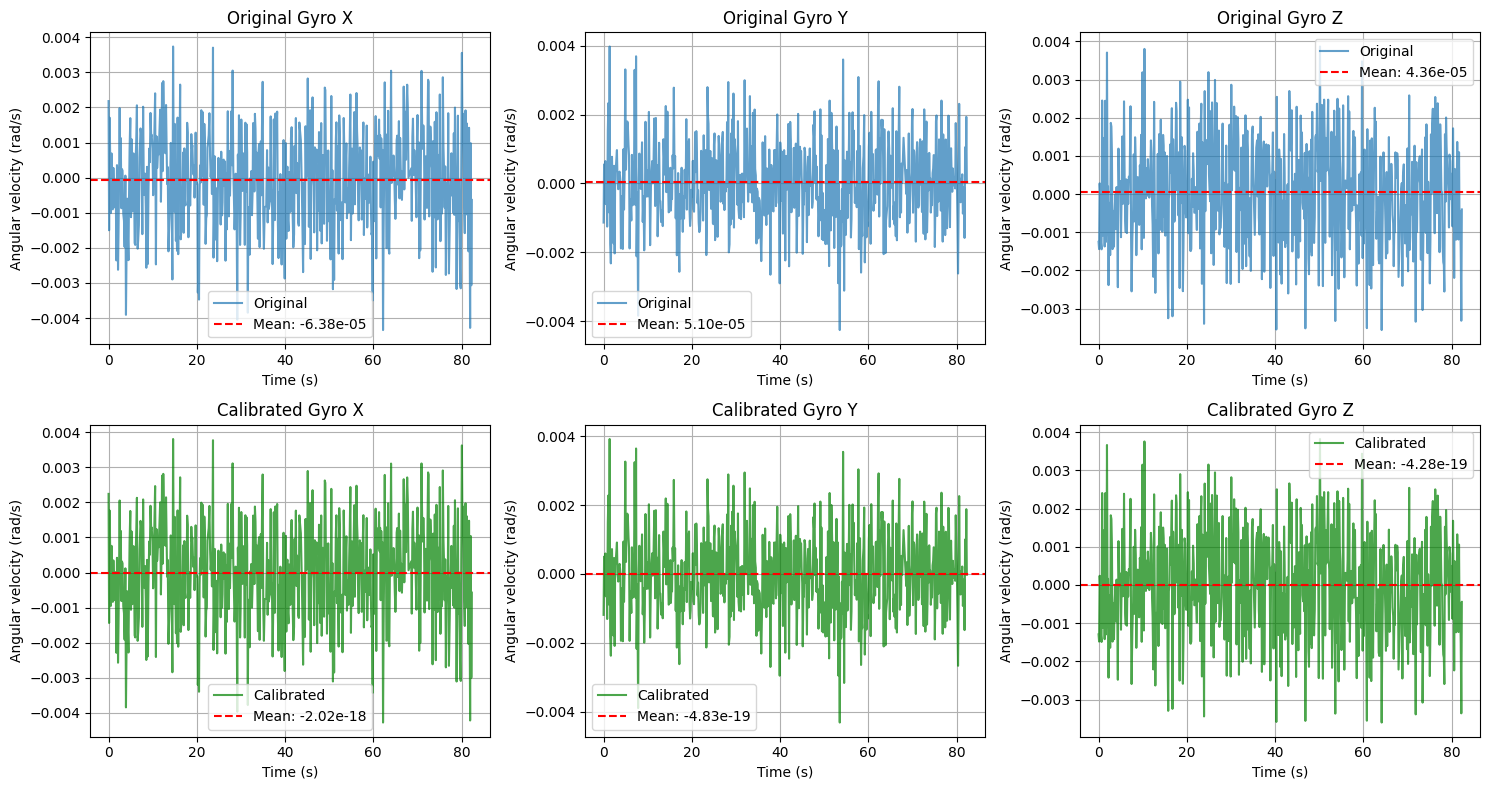

In [29]:
# Apply calibration to the regular orientation dataset as an example
df_regular_calibrated = apply_calibration_to_dataframe(df_regular, bias, Kg_matrix)

print("Calibration Applied to Regular Orientation Dataset")
print("=" * 55)
print(f"Original mean gyroscope values:")
print(f"  gyro_x: {df_regular['gyro_x'].mean():.6e} rad/s")
print(f"  gyro_y: {df_regular['gyro_y'].mean():.6e} rad/s")
print(f"  gyro_z: {df_regular['gyro_z'].mean():.6e} rad/s")

print(f"\nCalibratedmean gyroscope values:")
print(f"  gyro_x_cal: {df_regular_calibrated['gyro_x_cal'].mean():.6e} rad/s")
print(f"  gyro_y_cal: {df_regular_calibrated['gyro_y_cal'].mean():.6e} rad/s")
print(f"  gyro_z_cal: {df_regular_calibrated['gyro_z_cal'].mean():.6e} rad/s")

print(f"\nImprovement (reduction in mean bias):")
print(f"  gyro_x: {abs(df_regular['gyro_x'].mean()):.2e} → {abs(df_regular_calibrated['gyro_x_cal'].mean()):.2e}")
print(f"  gyro_y: {abs(df_regular['gyro_y'].mean()):.2e} → {abs(df_regular_calibrated['gyro_y_cal'].mean()):.2e}")
print(f"  gyro_z: {abs(df_regular['gyro_z'].mean()):.2e} → {abs(df_regular_calibrated['gyro_z_cal'].mean()):.2e}")

# Visualize the improvement
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

# Plot original data
for i, axis in enumerate(['x', 'y', 'z']):
    col = f'gyro_{axis}'
    axes[0, i].plot(df_regular['gyro_time'], df_regular[col], alpha=0.7, label='Original')
    axes[0, i].axhline(y=df_regular[col].mean(), color='red', linestyle='--', 
                       label=f'Mean: {df_regular[col].mean():.2e}')
    axes[0, i].set_title(f'Original Gyro {axis.upper()}')
    axes[0, i].set_xlabel('Time (s)')
    axes[0, i].set_ylabel('Angular velocity (rad/s)')
    axes[0, i].legend()
    axes[0, i].grid(True)

# Plot calibrated data
for i, axis in enumerate(['x', 'y', 'z']):
    col = f'gyro_{axis}_cal'
    axes[1, i].plot(df_regular_calibrated['gyro_time'], df_regular_calibrated[col], 
                    alpha=0.7, label='Calibrated', color='green')
    axes[1, i].axhline(y=df_regular_calibrated[col].mean(), color='red', linestyle='--',
                       label=f'Mean: {df_regular_calibrated[col].mean():.2e}')
    axes[1, i].set_title(f'Calibrated Gyro {axis.upper()}')
    axes[1, i].set_xlabel('Time (s)')
    axes[1, i].set_ylabel('Angular velocity (rad/s)')
    axes[1, i].legend()
    axes[1, i].grid(True)

plt.tight_layout()
plt.show()

## Fuzzy Logic Approach for Bias and Scale Factor Estimation
---

### Creating angles for Pitch and Roll

*References*
Título: A guide to using IMU (Accelerometer and Gyroscope) devices in industrial applications

Autor/Organização: STMicroelectronics

Referência: Application Note AN4508


---

Título: Tilt sensing using linear accelerometers

Autor: Mark A. S. L. Corrêa, et al.

Publicação: Anais do IX Simpósio Brasileiro de Automação Inteligente (SBAI), 2009.


In [33]:
# ROLL and PITCH

regular_roll = np.arctan2(regular_mean_acc_y, regular_mean_acc_z) * (180/np.pi)
regular_pitch = np.arctan2(-regular_mean_acc_x, 
                   np.sqrt(regular_mean_acc_y**2 + regular_mean_acc_z**2)) * (180/np.pi)

dark_roll = np.arctan2(dark_mean_acc_y, dark_mean_acc_z) * (180/np.pi)
dark_pitch = np.arctan2(-dark_mean_acc_x, 
               np.sqrt(dark_mean_acc_y**2 + dark_mean_acc_z**2)) * (180/np.pi)

primo_l_roll = np.arctan2(primo_l_mean_acc_y, primo_l_mean_acc_z) * (180/np.pi)
primo_l_pitch = np.arctan2(-primo_l_mean_acc_x,
                   np.sqrt(primo_l_mean_acc_y**2 + primo_l_mean_acc_z**2)) * (180/np.pi)

primo_r_roll = np.arctan2(primo_r_mean_acc_y, primo_r_mean_acc_z) * (180/np.pi)
primo_r_pitch = np.arctan2(-primo_r_mean_acc_x,
                   np.sqrt(primo_r_mean_acc_y**2 + primo_r_mean_acc_z**2)) * (180/np.pi)

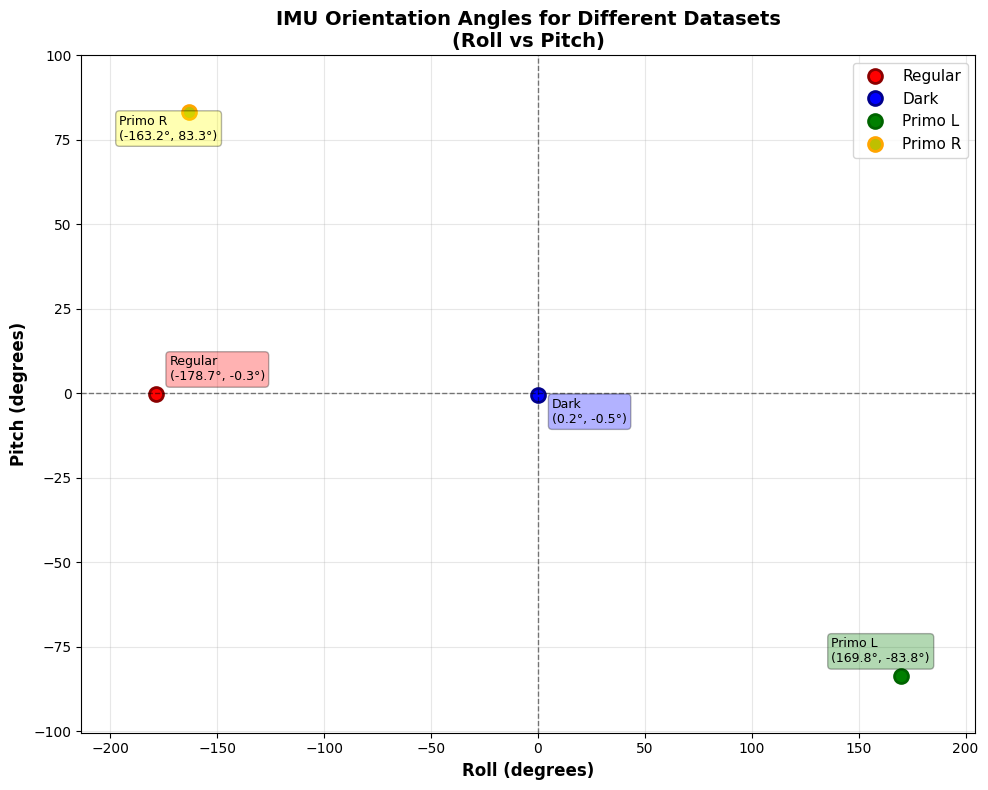

Orientation Summary:
Dataset    Roll (°)   Pitch (°) 
------------------------------
Regular     -178.7       -0.3
Dark           0.2       -0.5
Primo L      169.8      -83.8
Primo R     -163.2       83.3


In [35]:
plt.figure(figsize=(10, 8))
plt.plot(regular_roll, regular_pitch, 'ro', markersize=10, label='Regular', markeredgecolor='darkred', markeredgewidth=2)
plt.plot(dark_roll, dark_pitch, 'bo', markersize=10, label='Dark', markeredgecolor='darkblue', markeredgewidth=2)
plt.plot(primo_l_roll, primo_l_pitch, 'go', markersize=10, label='Primo L', markeredgecolor='darkgreen', markeredgewidth=2)
plt.plot(primo_r_roll, primo_r_pitch, 'yo', markersize=10, label='Primo R', markeredgecolor='orange', markeredgewidth=2)

# Add text annotations for each point
plt.annotate(f'Regular\n({regular_roll:.1f}°, {regular_pitch:.1f}°)', 
             (regular_roll, regular_pitch), xytext=(10, 10), 
             textcoords='offset points', fontsize=9, 
             bbox=dict(boxstyle='round,pad=0.3', facecolor='red', alpha=0.3))

plt.annotate(f'Dark\n({dark_roll:.1f}°, {dark_pitch:.1f}°)', 
             (dark_roll, dark_pitch), xytext=(10, -20), 
             textcoords='offset points', fontsize=9,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='blue', alpha=0.3))

plt.annotate(f'Primo L\n({primo_l_roll:.1f}°, {primo_l_pitch:.1f}°)', 
             (primo_l_roll, primo_l_pitch), xytext=(-50, 10), 
             textcoords='offset points', fontsize=9,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='green', alpha=0.3))

plt.annotate(f'Primo R\n({primo_r_roll:.1f}°, {primo_r_pitch:.1f}°)', 
             (primo_r_roll, primo_r_pitch), xytext=(-50, -20), 
             textcoords='offset points', fontsize=9,
             bbox=dict(boxstyle='round,pad=0.3', facecolor='yellow', alpha=0.3))

# Add grid and reference lines
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5, linewidth=1)
plt.axvline(x=0, color='k', linestyle='--', alpha=0.5, linewidth=1)

# Labels and title
plt.xlabel('Roll (degrees)', fontsize=12, fontweight='bold')
plt.ylabel('Pitch (degrees)', fontsize=12, fontweight='bold')
plt.title('IMU Orientation Angles for Different Datasets\n(Roll vs Pitch)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11, loc='best')

# Set axis limits with some padding
all_rolls = [regular_roll, dark_roll, primo_l_roll, primo_r_roll]
all_pitches = [regular_pitch, dark_pitch, primo_l_pitch, primo_r_pitch]
roll_range = max(all_rolls) - min(all_rolls)
pitch_range = max(all_pitches) - min(all_pitches)

plt.xlim(min(all_rolls) - roll_range*0.1, max(all_rolls) + roll_range*0.1)
plt.ylim(min(all_pitches) - pitch_range*0.1, max(all_pitches) + pitch_range*0.1)

plt.tight_layout()
plt.show()

# Print summary statistics
print("Orientation Summary:")
print("=" * 50)
print(f"{'Dataset':<10} {'Roll (°)':<10} {'Pitch (°)':<10}")
print("-" * 30)
print(f"{'Regular':<10} {regular_roll:7.1f}    {regular_pitch:7.1f}")
print(f"{'Dark':<10} {dark_roll:7.1f}    {dark_pitch:7.1f}")
print(f"{'Primo L':<10} {primo_l_roll:7.1f}    {primo_l_pitch:7.1f}")
print(f"{'Primo R':<10} {primo_r_roll:7.1f}    {primo_r_pitch:7.1f}")

### Fuzzy Rules